In [1]:
import pandas as pd
pd.set_option('display.precision', 3)
df = pd.read_csv('student_depression.csv')
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [2]:
df_input = df.drop(columns = ['City', 'Job Satisfaction', 'Profession','Academic Pressure','Work Pressure', 'CGPA', 'Study Satisfaction','Financial Stress', 'Degree'])

In [3]:
df_input['Gender'] = df_input['Gender'].replace({'Female': True, 'Male': False})

In [4]:
df_input.set_index(['id'], inplace = True)

In [5]:
df_input['Gender'] = df_input['Gender'].replace({'Female': True, 'Male': False})

In [6]:
df_input['Sleep Duration'].unique()

array(['5-6 hours', 'Less than 5 hours', '7-8 hours', 'More than 8 hours',
       'Others'], dtype=object)

In [7]:
df_input.to_csv('depression_input.csv')

In [8]:
#Depressivos e nao depressivos
depressed = (df['Depression'] == 1)
depressed_df = df[depressed]
print(depressed_df)

not_depressed = (df['Depression'] == 0)
not_depressed_df = df[not_depressed]
print(not_depressed_df)



           id  Gender   Age           City Profession  Academic Pressure  \
0           2    Male  33.0  Visakhapatnam    Student                5.0   
3          30  Female  28.0       Varanasi    Student                3.0   
8          59    Male  28.0         Nagpur    Student                3.0   
9          62    Male  31.0         Nashik    Student                2.0   
10         83    Male  24.0         Nagpur    Student                3.0   
...       ...     ...   ...            ...        ...                ...   
27887  140624    Male  32.0         Rajkot    Student                4.0   
27888  140630    Male  19.0        Kolkata    Student                4.0   
27891  140645  Female  28.0          Thane    Student                4.0   
27899  140690  Female  18.0       Ludhiana    Student                5.0   
27900  140699    Male  27.0          Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0                0.

In [9]:
# Calcular a média de 'Age', 'CGPA' e 'Academic Pressure' para o DataFrame com depressão
depressed_mean_ages = depressed_df[['Age', 'CGPA', 'Academic Pressure']].mean()
print('depressed')
print(depressed_mean_ages)

# Calcular a média de 'Age', 'CGPA' e 'Academic Pressure' para o DataFrame total (df)
mean_ages = df[['Age', 'CGPA', 'Academic Pressure']].mean()
print('all')
print(mean_ages)

# Calcular a média de 'Age', 'CGPA' e 'Academic Pressure' para o DataFrame sem depressão
not_depressed_mean_ages = not_depressed_df[['Age', 'CGPA', 'Academic Pressure']].mean()
print('not depressed')
print(not_depressed_mean_ages)


depressed
Age                  24.888
CGPA                  7.684
Academic Pressure     3.693
dtype: float64
all
Age                  25.822
CGPA                  7.656
Academic Pressure     3.141
dtype: float64
not depressed
Age                  27.142
CGPA                  7.617
Academic Pressure     2.362
dtype: float64


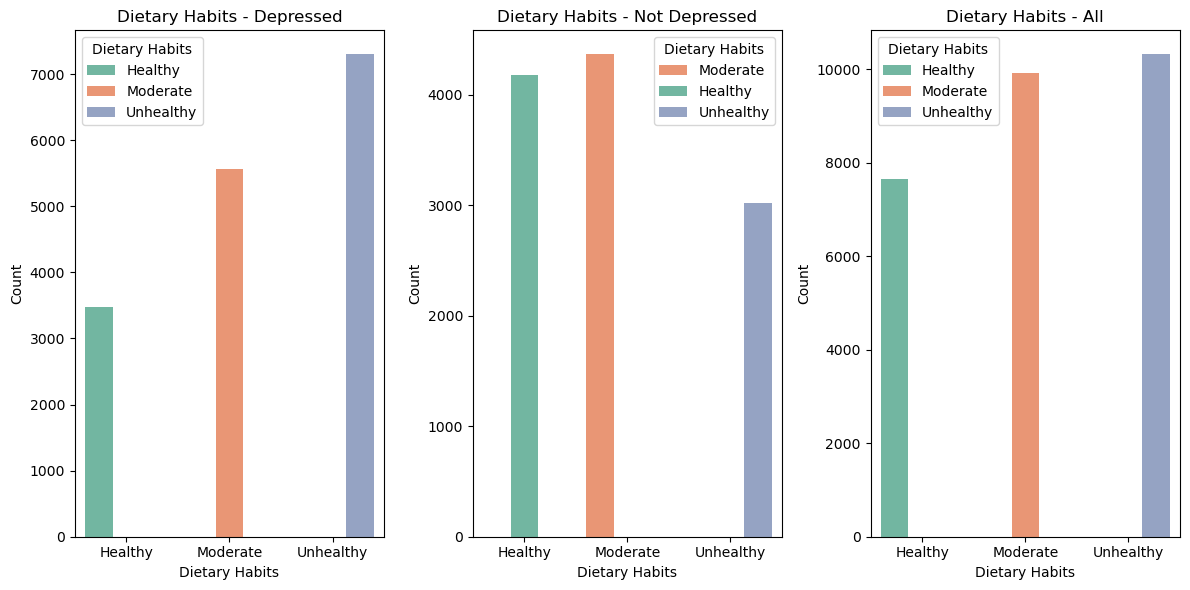

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Excluir a categoria "Others" de cada DataFrame
depressed_df_filtered = depressed_df[depressed_df['Dietary Habits'] != 'Others']
not_depressed_df_filtered = not_depressed_df[not_depressed_df['Dietary Habits'] != 'Others']
df_filtered = df[df['Dietary Habits'] != 'Others']

# Definir a ordem desejada para os hábitos alimentares
order = ['Healthy', 'Moderate', 'Unhealthy']

# Definir as cores para cada categoria, de forma explícita
color_palette = {'Healthy': '#66c2a5', 'Moderate': '#fc8d62', 'Unhealthy': '#8da0cb'}

# Plotando o gráfico para as 3 distribuições de Dietary Habits, com as cores representando 'Dietary Habits'
plt.figure(figsize=(12, 6))

# Plot para o grupo de pessoas com depressão
plt.subplot(1, 3, 1)
sns.countplot(data=depressed_df_filtered, x='Dietary Habits', palette=color_palette, hue='Dietary Habits', order=order)
plt.title('Dietary Habits - Depressed')
plt.xlabel('Dietary Habits')
plt.ylabel('Count')

# Plot para o grupo de pessoas sem depressão
plt.subplot(1, 3, 2)
sns.countplot(data=not_depressed_df_filtered, x='Dietary Habits', palette=color_palette, hue='Dietary Habits', order=order)
plt.title('Dietary Habits - Not Depressed')
plt.xlabel('Dietary Habits')
plt.ylabel('Count')

# Plot para o grupo total (df)
plt.subplot(1, 3, 3)
sns.countplot(data=df_filtered, x='Dietary Habits', palette=color_palette, hue='Dietary Habits', order=order)
plt.title('Dietary Habits - All')
plt.xlabel('Dietary Habits')
plt.ylabel('Count')

# Ajuste do layout
plt.tight_layout()
plt.show()


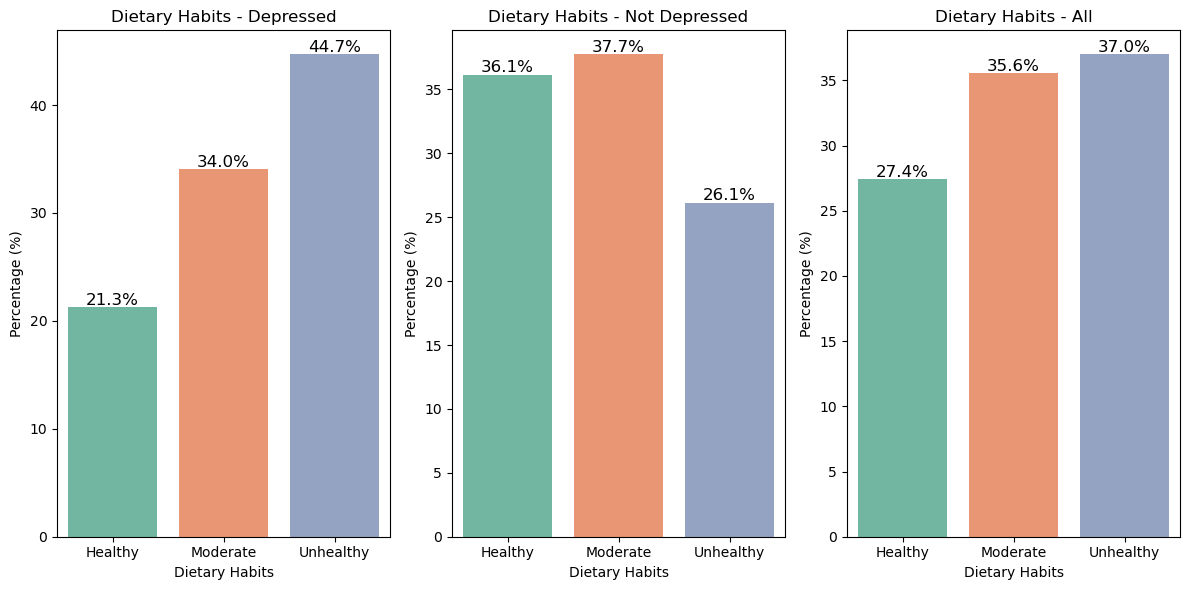

In [11]:


# Excluir a categoria "Others" de cada DataFrame
depressed_df_filtered = depressed_df[depressed_df['Dietary Habits'] != 'Others']
not_depressed_df_filtered = not_depressed_df[not_depressed_df['Dietary Habits'] != 'Others']
df_filtered = df[df['Dietary Habits'] != 'Others']

# Definir a ordem desejada para os hábitos alimentares
order = ['Healthy', 'Moderate', 'Unhealthy']

# Função para calcular as porcentagens e adicionar texto nas barras
def plot_percentage(df, title, subplot_pos):
    # Calcular a distribuição de porcentagens para 'Dietary Habits'
    dietary_habits_percent = df['Dietary Habits'].value_counts(normalize=True).reindex(order) * 100
    
    # Plotando o gráfico de barras com porcentagem
    plt.subplot(1, 3, subplot_pos)
    ax = sns.barplot(x=dietary_habits_percent.index, y=dietary_habits_percent.values, palette='Set2', order=order)
    plt.title(title)
    plt.xlabel('Dietary Habits')
    plt.ylabel('Percentage (%)')
    
    # Adicionando as porcentagens nas barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Plotando os gráficos de porcentagem para cada DataFrame
plt.figure(figsize=(12, 6))

# Plot para o grupo de pessoas com depressão
plot_percentage(depressed_df_filtered, 'Dietary Habits - Depressed', 1)

# Plot para o grupo de pessoas sem depressão
plot_percentage(not_depressed_df_filtered, 'Dietary Habits - Not Depressed', 2)

# Plot para o grupo total (df)
plot_percentage(df_filtered, 'Dietary Habits - All', 3)

# Ajuste do layout
plt.tight_layout()
plt.show()


In [12]:
df['Sleep Duration'].unique()

array(['5-6 hours', 'Less than 5 hours', '7-8 hours', 'More than 8 hours',
       'Others'], dtype=object)

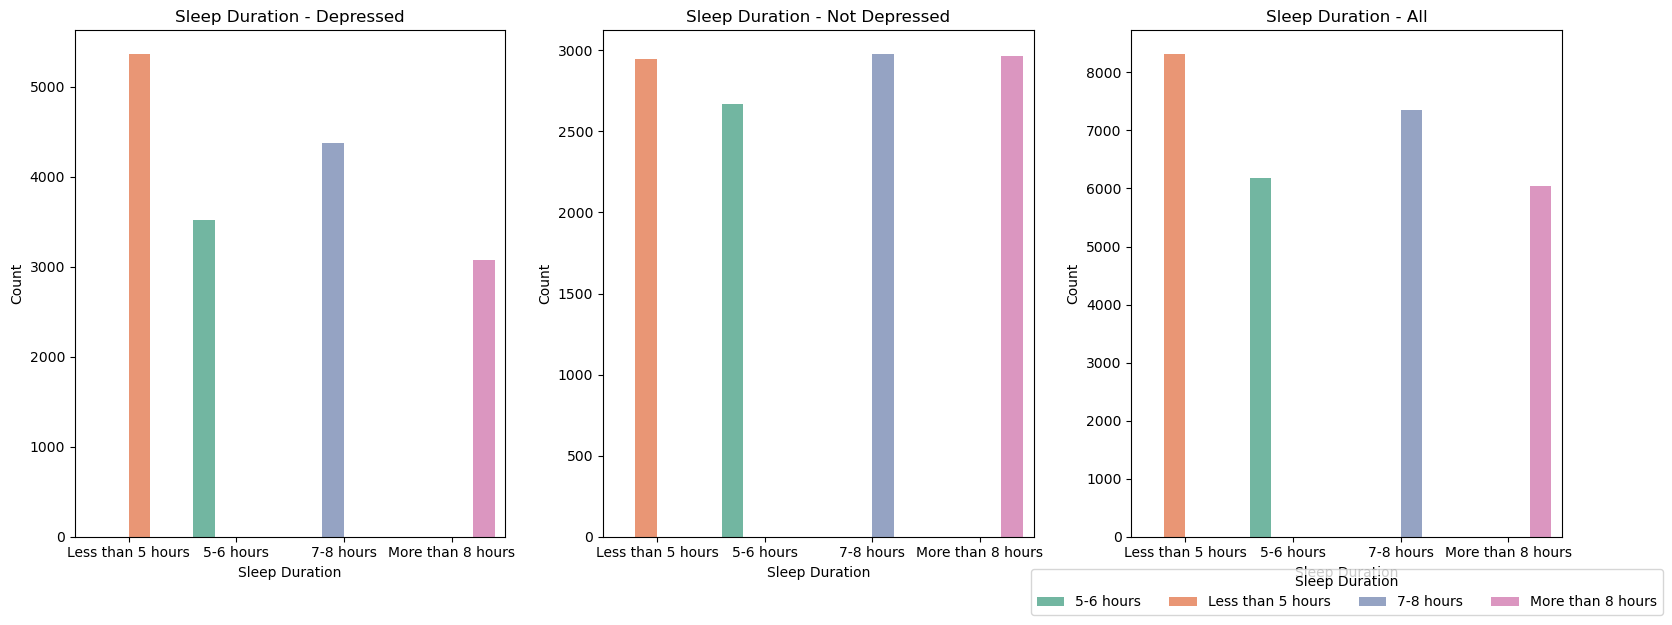

In [13]:

# Excluir a categoria "Others" de cada DataFrame
depressed_df_filtered = depressed_df[depressed_df['Sleep Duration'] != 'Others']
not_depressed_df_filtered = not_depressed_df[not_depressed_df['Sleep Duration'] != 'Others']
df_filtered = df[df['Sleep Duration'] != 'Others']
    
order_sleep = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']


color_palette_sleep = {
    'Less than 5 hours': '#fc8d62',
    '5-6 hours': '#66c2a5',
    '7-8 hours': '#8da0cb',
    'More than 8 hours': '#e78ac3'
}

plt.figure(figsize=(16, 6))

# Plot para o grupo de pessoas com depressão
ax1 = plt.subplot(1, 3, 1)
sns.countplot(data=depressed_df_filtered, x='Sleep Duration', palette=color_palette_sleep, hue='Sleep Duration', order=order_sleep, ax=ax1)
ax1.set_title('Sleep Duration - Depressed')
ax1.set_xlabel('Sleep Duration')
ax1.set_ylabel('Count')

# Plot para o grupo de pessoas sem depressão
ax2 = plt.subplot(1, 3, 2)
sns.countplot(data=not_depressed_df_filtered, x='Sleep Duration', palette=color_palette_sleep, hue='Sleep Duration', order=order_sleep, ax=ax2)
ax2.set_title('Sleep Duration - Not Depressed')
ax2.set_xlabel('Sleep Duration')
ax2.set_ylabel('Count')

ax3 = plt.subplot(1, 3, 3)
sns.countplot(data=df_filtered, x='Sleep Duration', palette=color_palette_sleep, hue='Sleep Duration', order=order_sleep, ax=ax3)
ax3.set_title('Sleep Duration - All')
ax3.set_xlabel('Sleep Duration')
ax3.set_ylabel('Count')

plt.tight_layout()
for ax in [ax1, ax2, ax3]:
    ax.get_legend().remove()

plt.legend(title='Sleep Duration', loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4, fontsize=10)

plt.show()


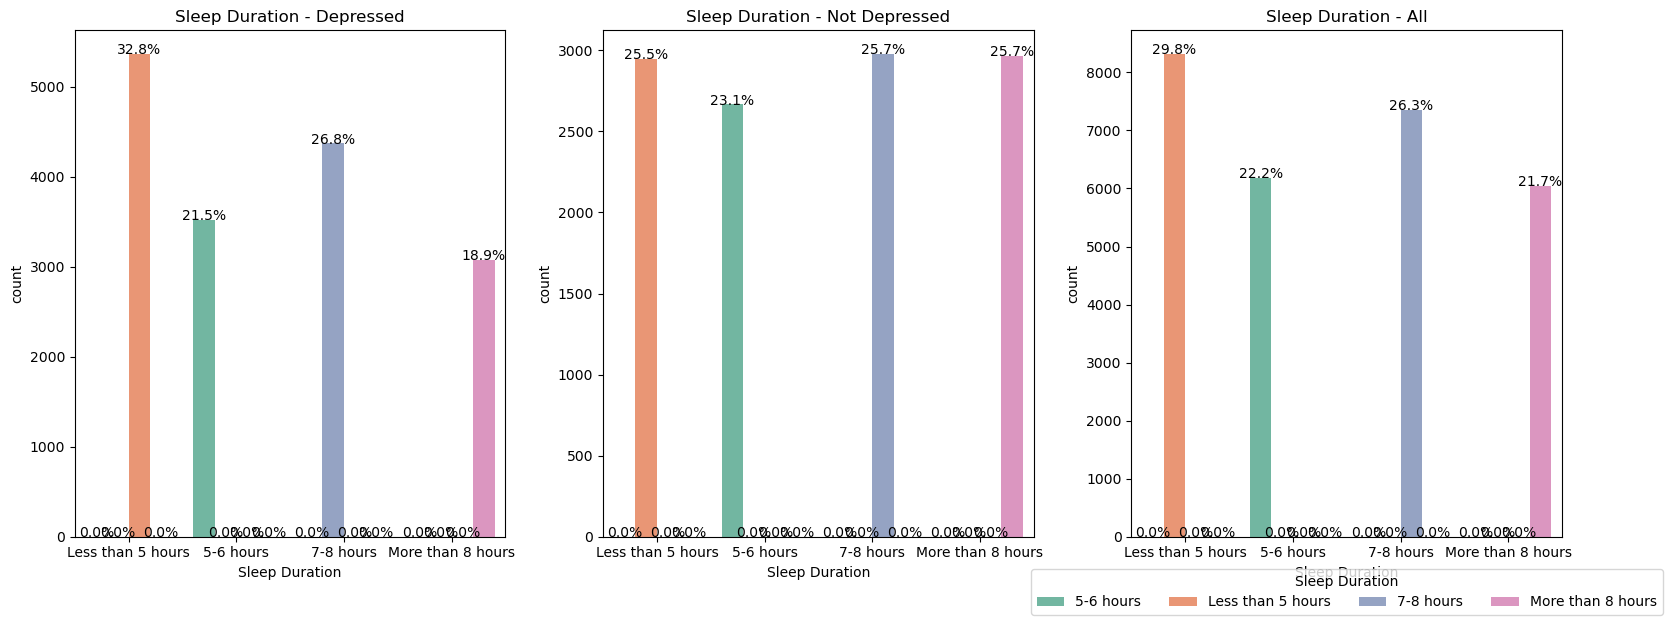

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Excluir a categoria "Others" de cada DataFrame
depressed_df_filtered = depressed_df[depressed_df['Sleep Duration'] != 'Others']
not_depressed_df_filtered = not_depressed_df[not_depressed_df['Sleep Duration'] != 'Others']
df_filtered = df[df['Sleep Duration'] != 'Others']

# Definir a ordem desejada para a duração do sono
order_sleep = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']

# Definir as cores para cada categoria, de forma explícita
color_palette_sleep = {
    'Less than 5 hours': '#fc8d62',
    '5-6 hours': '#66c2a5',
    '7-8 hours': '#8da0cb',
    'More than 8 hours': '#e78ac3'
}

# Função para adicionar as porcentagens nas barras
def add_percentages(ax, data):
    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        percentage = 100 * height / total
        ax.text(p.get_x() + p.get_width() / 2., height + 0.02, f'{percentage:.1f}%', ha="center", fontsize=10)

# Plotando o gráfico para as 3 distribuições de Sleep Duration, com as cores representando 'Sleep Duration'
plt.figure(figsize=(16, 6))  # Expandindo o tamanho da figura para dar mais espaço

# Plot para o grupo de pessoas com depressão
ax1 = plt.subplot(1, 3, 1)
sns.countplot(data=depressed_df_filtered, x='Sleep Duration', palette=color_palette_sleep, hue='Sleep Duration', order=order_sleep, ax=ax1)
ax1.set_title('Sleep Duration - Depressed')
add_percentages(ax1, depressed_df_filtered['Sleep Duration'])  # Adiciona as porcentagens

# Plot para o grupo de pessoas sem depressão
ax2 = plt.subplot(1, 3, 2)
sns.countplot(data=not_depressed_df_filtered, x='Sleep Duration', palette=color_palette_sleep, hue='Sleep Duration', order=order_sleep, ax=ax2)
ax2.set_title('Sleep Duration - Not Depressed')
add_percentages(ax2, not_depressed_df_filtered['Sleep Duration'])  # Adiciona as porcentagens

# Plot para o grupo total (df)
ax3 = plt.subplot(1, 3, 3)
sns.countplot(data=df_filtered, x='Sleep Duration', palette=color_palette_sleep, hue='Sleep Duration', order=order_sleep, ax=ax3)
ax3.set_title('Sleep Duration - All')

add_percentages(ax3, df_filtered['Sleep Duration'])  # Adiciona as porcentagens

# Ajustando o layout para dar mais espaço entre os gráficos
plt.tight_layout()

# Remover as legendas dos subgráficos individuais
for ax in [ax1, ax2, ax3]:
    ax.get_legend().remove()

# Adicionando uma única legenda fora do gráfico, centralizada
plt.legend(title='Sleep Duration', loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4, fontsize=10)

plt.show()
